<a href="https://colab.research.google.com/github/tomohiko-urai/minnano_ai/blob/master/16_Machigai_Sagashi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# まちがい探し

## Python + OpenCV

# PDFのためのオープンソースのインストール

In [ ]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 0s (1,849 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 128048 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-py

# サンプルデータのダウンロード

※使用したデータの出典

動作の確認には「学習プリント.com」に掲載のデータを使用しています。

https://xn--fdk3a7ctb5192box5b.com/yo/machigaisagashi_hard_creature_animal.html


In [ ]:
# ＰＤＦをダウンロードし、animal.pdfの名前で保存する

!wget https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_005-01.pdf -O animal.pdf
# !wget https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_005-02.pdf -O animal.pdf
# !wget https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_005-03.pdf -O animal.pdf
# !wget https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_005-04.pdf -O animal.pdf
# !wget https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_005-05.pdf -O animal.pdf
# !wget https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_008-02.pdf -O animal.pdf
# !wget https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_008-03.pdf -O animal.pdf
# !wget https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_008-04.pdf -O animal.pdf
# !wget https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_008-05.pdf -O animal.pdf


--2023-02-11 02:50:01--  https://xn--fdk3a7ctb5192box5b.com/pdf/yo/machigaisagashi/hard/creature/animal_005-01.pdf
Resolving xn--fdk3a7ctb5192box5b.com (xn--fdk3a7ctb5192box5b.com)... 183.90.238.49
Connecting to xn--fdk3a7ctb5192box5b.com (xn--fdk3a7ctb5192box5b.com)|183.90.238.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315393 (308K) [application/pdf]
Saving to: ‘animal.pdf’

animal.pdf          100%[===================>] 308.00K   668KB/s    in 0.5s    

2023-02-11 02:50:02 (668 KB/s) - ‘animal.pdf’ saved [315393/315393]



# Pythonプログラム

In [ ]:
# モジュールのインポート

import cv2
import numpy as np

import datetime
import matplotlib.pyplot as plt
import os

from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

In [ ]:
# Colaboratory 独自モジュールのインポート

from google.colab.patches import cv2_imshow

# Pythonの関数定義

In [ ]:
# ＰＤＦを画像ファイルに変換する

def PDF2Image(filename):
  pages = convert_from_bytes(open(filename, 'rb').read(), size=800)
  # display(pages[0])
  pages[0].save('a.jpg', 'JPEG')

  img_bgr = np.array(pages[0])
  print('画像のサイズ(height, width)：' + str(img_bgr.shape[:2]))

  plt.figure(figsize=(10, 8), dpi=100)
  plt.subplot(1, 1, 1)
  plt.imshow(img_bgr)
  plt.title(filename + ' to image [a.jpg]')  

In [ ]:
# 画像を左右に分割する

def SplitImage():
  img = cv2.imread('a.jpg')

  # 画像を切り出す
  # img[top : bottom, left : right]

  imgLeft = img[148 : 500, 26 : 388]
  imgRight = img[0 : 600, 380 : 800 ]

  cv2.imwrite('left.jpg', imgLeft)
  cv2.imwrite('right.jpg', imgRight)

  plt.figure(figsize=(10, 8), dpi=100)

  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(imgLeft, cv2.COLOR_BGR2RGB))
  plt.title('left.jpg')

  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(imgRight, cv2.COLOR_BGR2RGB))
  plt.title('right.jpg')

# 画像の前処理

画像のサイズ(height, width)：(566, 800)


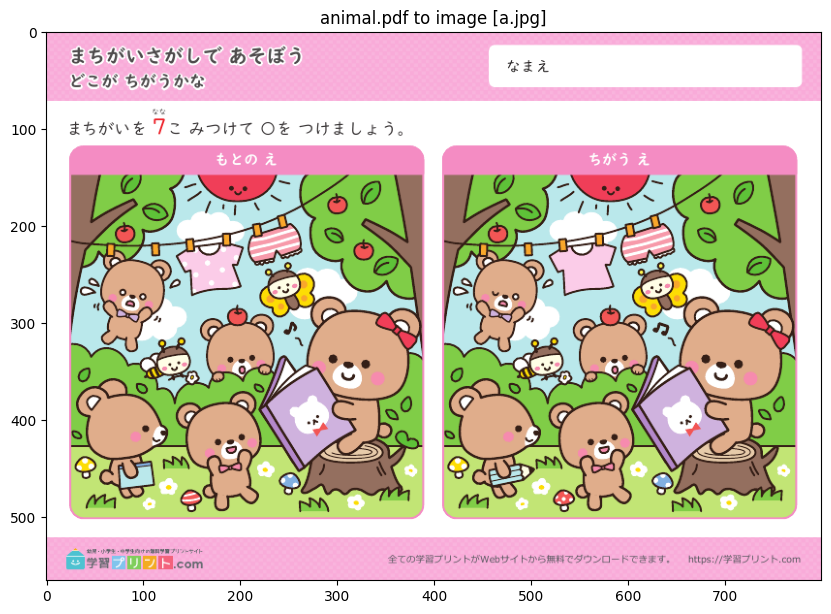

In [ ]:
# ＰＤＦを画像ファイル変換する

PDF2Image('animal.pdf')

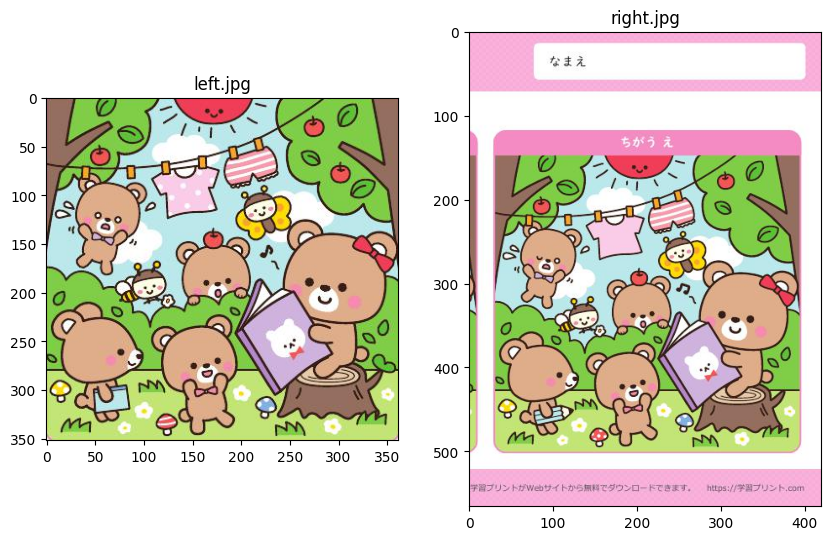

In [ ]:
# 画像ファイルを左右２枚の画像ファイルに分割する

SplitImage()

# 主処理

In [ ]:
# 左右の画像を読み込む
imgLeft = cv2.imread('left.jpg')
imgRight = cv2.imread('right.jpg')

# 画像サイズを取得する
hA, wA, _ = imgLeft.shape[:3]
# hB, wB, _ = imgRight.shape [:3]

In [ ]:
# 特徴量検出器を作成
akaze = cv2.AKAZE_create()

# 二つの画像の特徴点を抽出
kpA, desA = akaze.detectAndCompute(imgLeft, None)
kpB, desB = akaze.detectAndCompute(imgRight, None)

In [ ]:
# BFMatcher型のオブジェクトを作成する
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# 記述子を一致させる
matches = bf.match(desA, desB)

# 距離の順に並べ替える
matches = sorted(matches, key = lambda x:x.distance)

# 先頭から上位約15%を取り出す
good = matches[:int(len(matches) * 0.15)]

# 特徴点の座標を取り出す
src_pts = np.float32([kpA[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts = np.float32([kpB[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

射影変換した右画像


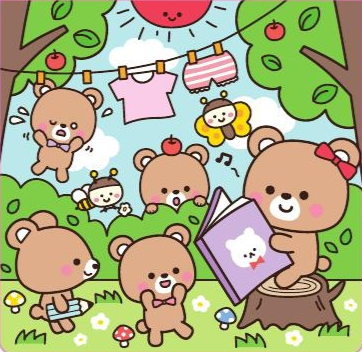

In [ ]:
# ホモグラフィ変換行列をもとめる
## ホモグラフィとは、平面を射影変換を用いて別の平面に射影すること
H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0) # RANSAC : Random Sample Consensus
# H, mask = cv2.findHomography(dst_pts, src_pts, cv2.LMEDS)       # LMEDS : Least Median of Squares
# H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RHO)         # RHO : 

# imgRightを射影変換。
imgRight_transform = cv2.warpPerspective(imgRight, H, (wA, hA))

print('射影変換した右画像')
cv2_imshow(imgRight_transform)

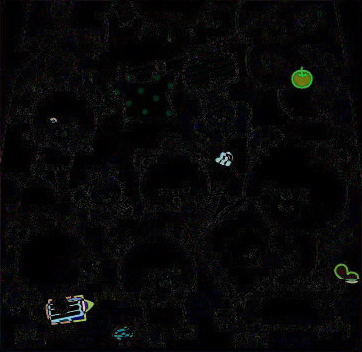

In [ ]:
# 左右の画像の差分をもとめる
result = cv2.absdiff(imgLeft, imgRight_transform)

cv2_imshow(result)

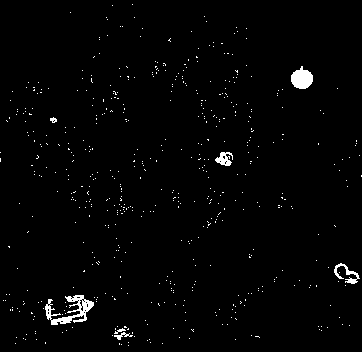

In [ ]:
# カラー　⇒　グレースケール　変換
result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# グレースケール　⇒　二値化（しきい値）　変換
## しきい値：35 を適用した
## しきい値は対象の画像により最適値を見つける
_, result_bin = cv2.threshold(result_gray, 35, 255, cv2.THRESH_BINARY)

cv2_imshow(result_bin)

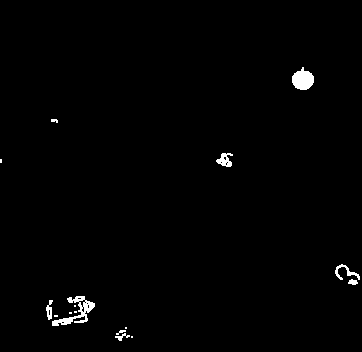

In [ ]:
# カーネルを準備する
kernel = np.ones((2, 2), np.uint8)

# モルフォロジー変換（オープニング）
## オープニングは、画像を収縮させたあとに膨張させる。細かいノイズの除去に適している
result_bin = cv2.morphologyEx(result_bin, cv2.MORPH_OPEN, kernel)

cv2_imshow(result_bin)

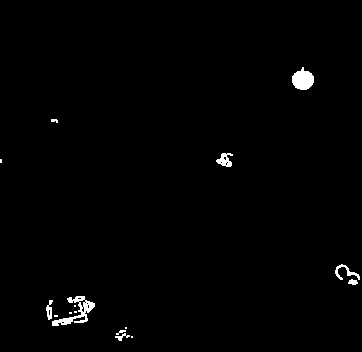

In [ ]:
# 二値画像をRGB形式に変換する
result_bin_rgb = cv2.cvtColor(result_bin, cv2.COLOR_GRAY2RGB)

cv2_imshow(result_bin_rgb)

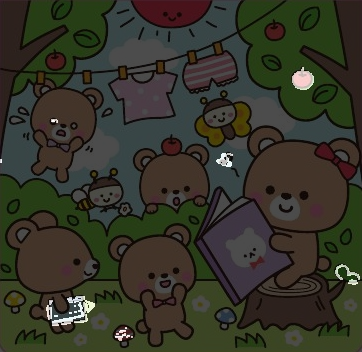

In [ ]:
# 左の画像に処理した差分画像を重ね合わせる

## cv.addWeighted(src1, alpha, src2, beta, gamma)
result_add = cv2.addWeighted(imgLeft, 0.3, result_bin_rgb, 0.7, 0)

cv2_imshow(result_add)